In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [4]:
#load the dataset and separate the features from the labels
df=pd.read_csv('dataset.csv')
X=np.array(df[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum","source_ip","dest_ip"]],dtype=np.chararray)
##without ip addresses
X=np.array(df[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum"]],dtype=np.chararray)

Y=np.array(df[["label"]],dtype=bool)

#convert the features to numerical values

X=X.reshape(X.shape[0],X.shape[1])

Y=Y.reshape(Y.shape[0],)

for i in range(0,len(X)):
    for j in range(0,len(X[i])):
        X[i][j]=int(str(X[i][j]),2)

#split the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




In [5]:
#create the model for the decision tree
Model=DecisionTreeClassifier(criterion='entropy',splitter='best',min_impurity_decrease=0.001)
Model=RandomForestClassifier(n_estimators=1000,criterion='entropy',min_impurity_decrease=0.001)
#train the model
Model.fit(X_train,Y_train)
#predict the labels for the testing dataset
y_pred=Model.predict(X_test)
#calculate the accuracy of the model
accuracy=sklearn.metrics.accuracy_score(Y_test,y_pred)
loss=sklearn.metrics.f1_score(Y_test,y_pred)
print(f"accuracy: {accuracy} score: {loss}")



accuracy: 0.9656084656084656 loss: 0.9625831984169816


In [17]:
dict={}
for i,feature_name in enumerate(df[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum"]]):
    dict[feature_name]= Model.feature_importances_[i]
#sort the features by importance
dict=sorted(dict.items(),key=lambda x:x[1],reverse=True)
for element in dict:
    print(f"{element[0]}: {element[1]}")

ttl: 0.35013077731809733
total_length: 0.25005386055304163
identification: 0.16657743402759745
header_checksum: 0.12555542395065106
protocol: 0.05944172715210881
flags: 0.04376201251606007
tos: 0.004478764482443512
version: 0.0
ihl: 0.0
fragment_offset: 0.0


In [54]:
df_ver=pd.read_csv('verification.csv')
X_ver=np.array(df_ver[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum","source_ip","dest_ip"]],dtype=object)
#without ip addresses
X_ver=np.array(df_ver[["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum"]],dtype=object)
X_ver=X_ver.reshape(X_ver.shape[0],X_ver.shape[1])
for i in range(0,len(X_ver)):
    for j in range(0,len(X_ver[i])):
        X_ver[i][j]=int(str(X_ver[i][j]),2)
print(X_ver[0])
Y_ver=np.array(df_ver[["label"]],dtype=bool)
Y_ver=Y_ver.reshape(Y_ver.shape[0],)
y_pred=Model.predict(X_ver)
accuracy=sklearn.metrics.accuracy_score(Y_ver,y_pred)
loss=sklearn.metrics.f1_score(Y_ver,y_pred)
print(f"accuracy: {accuracy} loss: {loss}")



[4 5 0 1412 64865 2 0 56 6 25305]
accuracy: 0.7021513987240973 loss: 0.5942288362058398


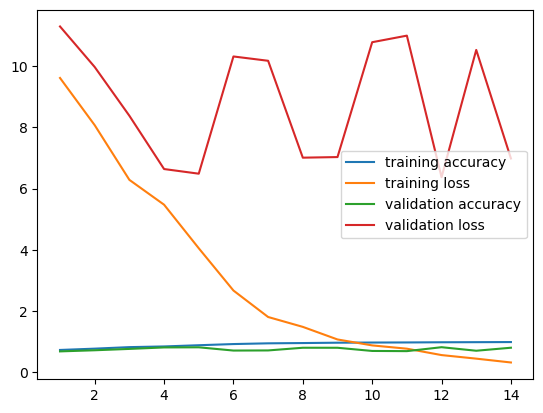

In [39]:
#train the model with many different depths and plot the accuracy and loss
depths=np.arange(1,15)
acc=[]
loss=[]
val_acc=[]
val_loss=[]

for i in depths:
    Model=DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter='best')
    Model.fit(X_train,Y_train)
    y_pred=Model.predict(X_test)
    loss.append(sklearn.metrics.log_loss(Y_test,y_pred))
    acc.append(sklearn.metrics.accuracy_score(Y_test,y_pred))
    y_pred=Model.predict(X_ver) 
    val_acc.append(sklearn.metrics.accuracy_score(Y_ver,y_pred))
    val_loss.append(sklearn.metrics.log_loss(Y_ver,y_pred))

plt.plot(depths,acc,label='training accuracy')
plt.plot(depths,loss,label='training loss')
plt.plot(depths,val_acc,label='validation accuracy')
plt.plot(depths,val_loss,label='validation loss')
plt.legend()
plt.show()


In [42]:
#print the number of IPs that are the same in verification and training dataset out of the total number of IPs in the verification dataset
print(len(set(df_ver['source_ip']).intersection(set(df['source_ip']))) / len(df_ver['source_ip']))

0.013433869908311363


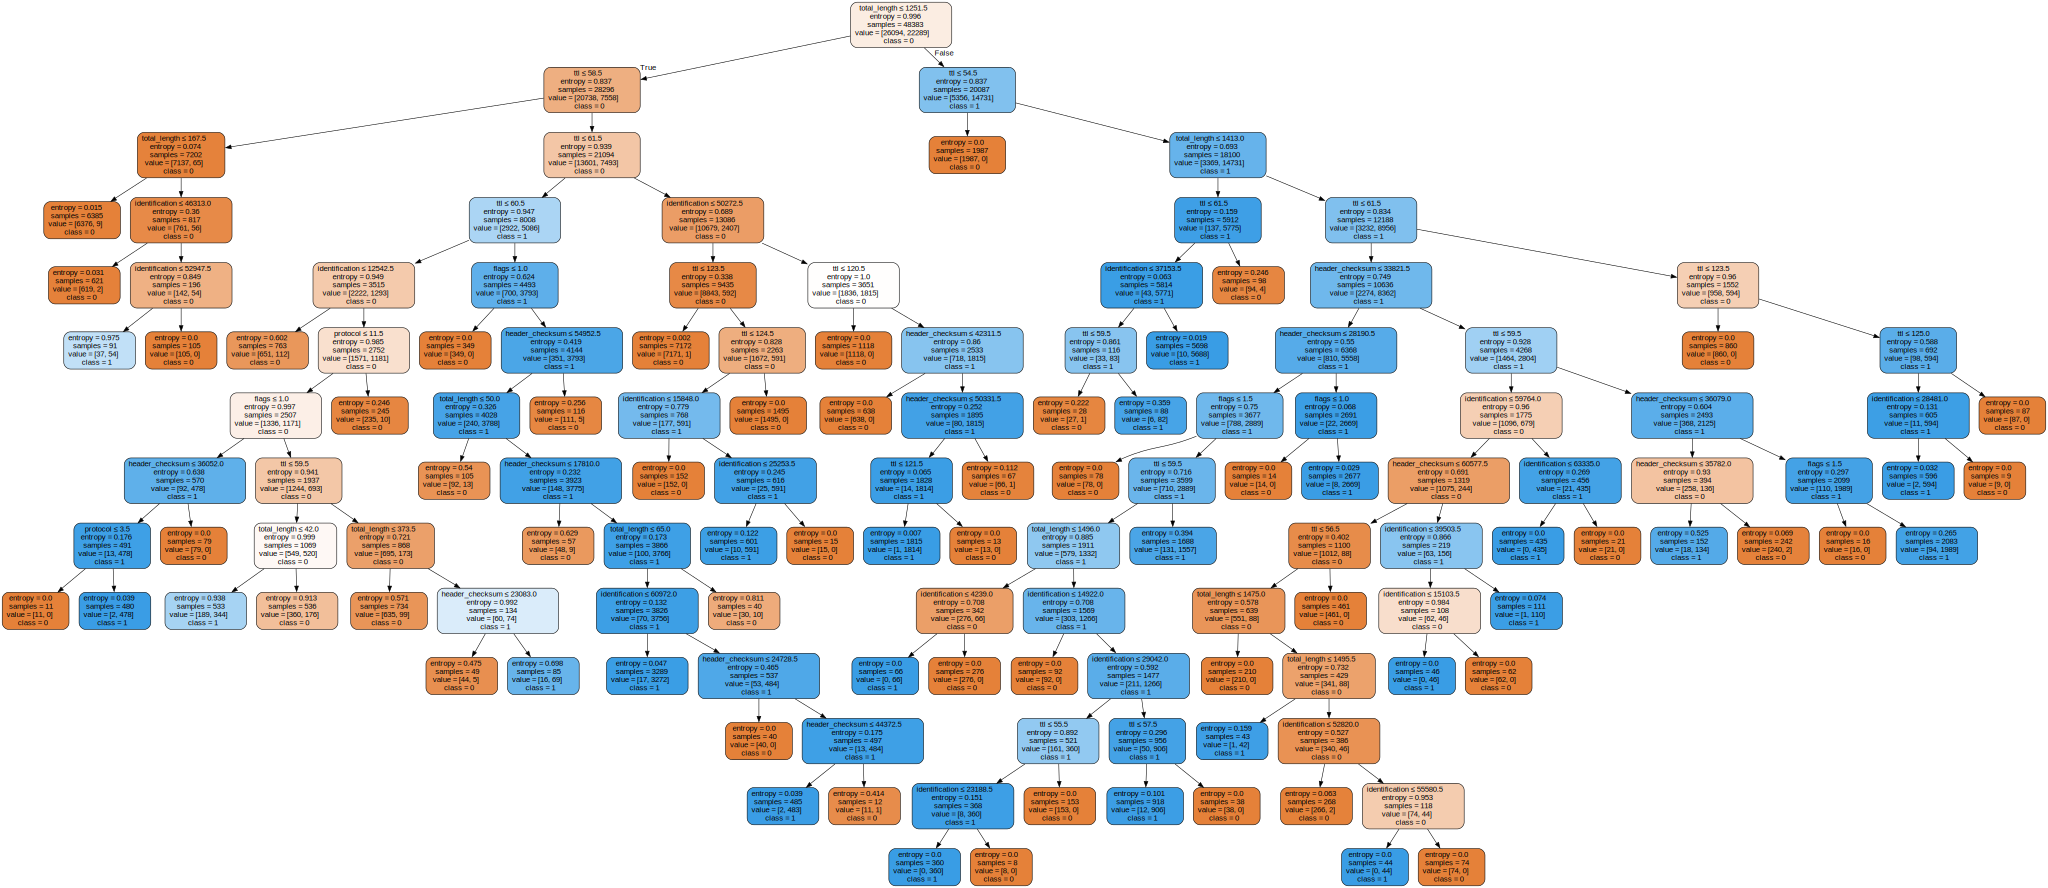

In [55]:
dot_data = export_graphviz(Model, out_file=None, feature_names=["version","ihl","tos","total_length","identification","flags","fragment_offset","ttl","protocol","header_checksum",],
                           class_names=['0', '1'], filled=True, rounded=True,
                           special_characters=True)

# visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render('decision_tree_model', format='png') # save the visualization as a PNG file
graph # show the visualization in the Jupyter Notebook


